#<font color="magenta">**Task 1: <ins>Prediction using Supervised ML</ins>**</font>
### To Predict the percentage of a student on the basis of the number of hours they study.
### What will be predicted score if a student studies for 9.25 hrs/ day?
#### <font color="purple">**Author:**</font> **Rahul Noronha**


## Link to Data used in the Problem: [**Data**](http://bit.ly/w-data)

### **<ins>Steps involved in Supervised ML</ins>:**
1. Data Collection.
1. Data Preparation.
  1. Clean Data.
  1. Randomize Data.
  1. Visualize Data.
  1. Split Data into Training and Testing Sets.
1. Selecting a Model.
1. Training the Model.
1. Making Predictions using the trained Model.
1. Evaluating the Model.


## **Step 1: <ins>Data Collection</ins>**
We have obtained the data from the link shown above. The data was provided by The Sparks Foundation to be used for this particular task. The data is stored in a CSV file.

In [1]:
#Importing Necessary Libraries.
import pandas as pd #For data processing.
import numpy as np #For data processing.
import sklearn #For Linear regression.
from matplotlib import pyplot as plt #For visualization.
from sklearn.model_selection import * #For Linear regression.
from sklearn.utils import shuffle #For Randomization
from sklearn.linear_model import * #For Linear regression.
from sklearn import metrics #To measure the performance of the model.
%matplotlib inline 
#To make the plots appear, and get stored within the Notebook Window.

In [2]:
#Store the data from the url using pandas 
data = pd.read_csv('http://bit.ly/w-data', sep=',') 
#read_csv method is used passing seperator as ',' which will extract data from the csv file into a pandas Data Frame.

In [3]:
#Ensure data is present in data variable. 
print(data.shape,end="\n\n\n\n")#shape Returns a tuple representing the dimensionality of the DataFrame.
print(data.describe(),end="\n\n\n\n")#describe is used to Generate descriptive statistics of the DataFrame.
print(data.to_markdown())#The entire data of the DataFrame is printed and we notice the given data has 24 values provided.

(25, 2)



           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000



|    |   Hours |   Scores |
|---:|--------:|---------:|
|  0 |     2.5 |       21 |
|  1 |     5.1 |       47 |
|  2 |     3.2 |       27 |
|  3 |     8.5 |       75 |
|  4 |     3.5 |       30 |
|  5 |     1.5 |       20 |
|  6 |     9.2 |       88 |
|  7 |     5.5 |       60 |
|  8 |     8.3 |       81 |
|  9 |     2.7 |       25 |
| 10 |     7.7 |       85 |
| 11 |     5.9 |       62 |
| 12 |     4.5 |       41 |
| 13 |     3.3 |       42 |
| 14 |     1.1 |       17 |
| 15 |     8.9 |       95 |
| 16 |     2.5 |       30 |
| 17 |     1.9 |       24 |
| 18 |     6.1 |       67 |
| 19 |     7.4 |       69 |
| 20 |     2.7 |       30 |
| 21 |     4.8 |       54 |
| 22 |     3.8 |       35 |
| 23 |     6.9 |       76 |
| 24 |

## **Step 2: <ins>Data Preparation</ins>**
The data needs to be prepared before it can be used to create a Linear Regression Model and this process has sub-steps.
  1. Clean Data
  1. Randomize Data
  1. Visualize Data
  1. Split Data into Training and Test Sets

### **<ins>Clean Data</ins>**
We need to check if the data has any missing values, and if they do we need to deal with these missing values. If not we can proceed with the next step.

In [4]:
null_values = data.isnull().sum()#isnull detect missing values and sum is used to find the total number of these missing values.
print(null_values)#Print the number of null values in the DataFrame.

Hours     0
Scores    0
dtype: int64


In [5]:
#If the DataFrame has no Null values then we do not need to do any processing of Null values
if (null_values.Hours==0 and null_values.Scores==0):
  pass 
else:
  data.dropna(axis=0, how='any')#Drop any row (axis=0) which has one or more Null values (how= 'any').
  print(data.to_markdown())#Print the data which has been formatted to not include anymore Null values and proceed to the further steps.

### **<ins>Randomize Data</ins>**

In [6]:
data = shuffle(data) #To randomize the data before Linear Regression
print(data.to_markdown())

|    |   Hours |   Scores |
|---:|--------:|---------:|
| 13 |     3.3 |       42 |
|  6 |     9.2 |       88 |
| 18 |     6.1 |       67 |
| 20 |     2.7 |       30 |
|  5 |     1.5 |       20 |
|  0 |     2.5 |       21 |
| 10 |     7.7 |       85 |
|  2 |     3.2 |       27 |
|  8 |     8.3 |       81 |
| 22 |     3.8 |       35 |
|  1 |     5.1 |       47 |
| 11 |     5.9 |       62 |
| 21 |     4.8 |       54 |
| 24 |     7.8 |       86 |
|  4 |     3.5 |       30 |
| 23 |     6.9 |       76 |
| 17 |     1.9 |       24 |
| 16 |     2.5 |       30 |
| 15 |     8.9 |       95 |
|  7 |     5.5 |       60 |
| 19 |     7.4 |       69 |
| 12 |     4.5 |       41 |
|  9 |     2.7 |       25 |
| 14 |     1.1 |       17 |
|  3 |     8.5 |       75 |


### **<ins>Visualize Data</ins>**

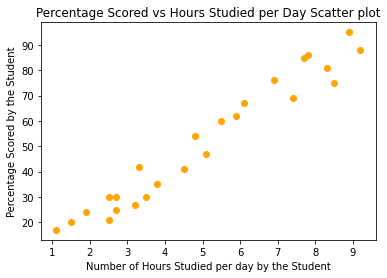

In [7]:
plt.scatter(data.Hours,data.Scores, c='orange')#Create a Scatter plot of the given Data after it has been randomized
plt.xlabel('Number of Hours Studied per day by the Student')#Label the X-axis of the Scatter Plot
plt.ylabel('Percentage Scored by the Student')#Label the Y-axis of the Scatter Plot
plt.title('Percentage Scored vs Hours Studied per Day Scatter plot')#Title the Whole Scatter Plot
plt.show()

### **<ins>Split Data into Train and Test Set</ins>**

In [8]:
#Split the Data into attributes (x) and output (y)
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [9]:
#Then split the attributes and output into train set and test set using a desired test_size using train_test_split method
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size=0.2, random_state = 0)

## **Step 3: <ins>Selecting a Model</ins>**

**As we observed in the scatterplot, we saw a positive linear relationship** **between the attributes (Hours Studied per day) and the outputs (Percentage scored) and hence we choose the Linear** **Regression Model and begin with the next step of training the algorithm.**

## **Step 4: <ins>Training the Model</ins>**

In [10]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

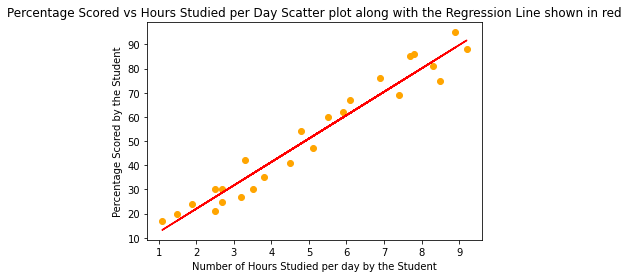

In [11]:
#Plot the regression line using the equation y = mx + b where the coefficients m and b are determined by the linear regression process
line = regressor.coef_*x+regressor.intercept_
#Plot the data and show the regression line on the same plot 
plt.scatter(x, y, c='orange')
plt.plot(x, line, c='red')
plt.xlabel('Number of Hours Studied per day by the Student')#Label the X-axis of the Scatter Plot
plt.ylabel('Percentage Scored by the Student')#Label the Y-axis of the Scatter Plot
plt.title('Percentage Scored vs Hours Studied per Day Scatter plot along with the Regression Line shown in red')#Title the Whole Scatter Plot
plt.show()

## **Step 5: <ins>Making Predictions using the Model</ins>**

**Let us make predictions for a few test values using the built Regression Model and compare them with the actual outputs obtained in the Data given to see how the Model performs, and later in the Testing phase we will use some statistical tools to check the performance of the model.** 

In [12]:
print(x_test)#Testing data that is passed in Hours
y_pred = regressor.predict(x_test) #Predicting the scores by the Linear Regression Model for the test inputs x_test


[[2.5]
 [6.1]
 [5.5]
 [1.9]
 [5.9]]


In [13]:
comparison_frame = pd.DataFrame({'Actual Outcome':y_test, 'Predicted Outcome':y_pred})
print(comparison_frame.to_markdown())

|    |   Actual Outcome |   Predicted Outcome |
|---:|-----------------:|--------------------:|
|  0 |               21 |             26.8133 |
|  1 |               67 |             61.6493 |
|  2 |               60 |             55.8433 |
|  3 |               24 |             21.0073 |
|  4 |               62 |             59.714  |


**Now we need to find out how much percentage a student studying for 9.25 hours** 
**per day will obtain.**

In [14]:
test_hour = 9.25
prediction_output = regressor.predict([[test_hour]])
print(prediction_output)
print(f"Number of Hours Studied per day = {test_hour}/day. ")
print(f"Predicted Percentage of Student is = {prediction_output[0]}")


[92.13082369]
Number of Hours Studied per day = 9.25/day. 
Predicted Percentage of Student is = 92.1308236923214


## **Step 6: <ins>Evaluating the Model</ins>**

**Now we will evaluate the Model performance using some Statistical Methods.**


In [15]:
print(regressor.score(x_test,y_test))

0.9530294955738032


In [16]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sqaure Error:',metrics.mean_squared_error(y_test, y_pred ))
print('Root Mean Sqaure Error:',metrics.mean_squared_error(y_test, y_pred )**0.5)


Mean Absolute Error: 4.119885052336925
Mean Sqaure Error: 18.7769288494164
Root Mean Sqaure Error: 4.333235378953744


**This means the model gives** 
1. R-squared value of 0.9530294955738032 
1. Mean Absolute Error: 4.119885052336925
1. Mean Sqaure Error: 18.7769288494164
1. Root Mean Sqaure Error: 4.333235378953744